In [6]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


In [7]:
train_data=pd.read_csv(r"C:\Users\agnes\Documents\apziva_ai_residency\project5\data\apple_train_data.csv")


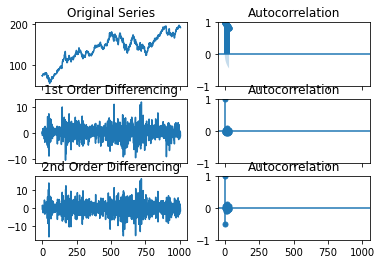

In [8]:
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_data.Close); axes[0, 0].set_title('Original Series')
plot_acf(train_data.Close, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(train_data.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_data.Close.diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(train_data.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train_data.Close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['Close'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1006
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2403.540
Date:                Sun, 21 Apr 2024   AIC                           4815.080
Time:                        19:44:49   BIC                           4834.731
Sample:                             0   HQIC                          4822.547
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2509      1.228      0.204      0.838      -2.156       2.658
ma.L1         -0.2918      1.231     -0.237      0.813      -2.705       2.121
ma.L2         -0.0114      0.064     -0.180      0.8

In [19]:
model_fit.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'